In [10]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from roboflow import Roboflow

## Load Roboflow

In [2]:
rf = Roboflow(api_key="rJbzS6OOSy0lHVUofBsc")
project = rf.workspace().project("letter-classification")
model = project.version(10).model

loading Roboflow workspace...
loading Roboflow project...


## Load Image

In [3]:
image_name = "testa3"

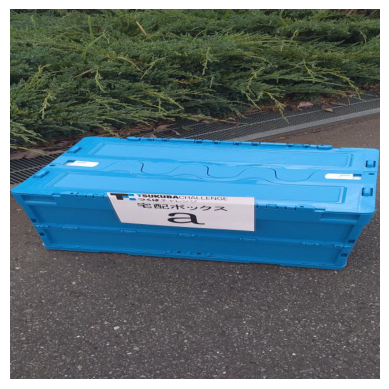

In [5]:
# Load the image using matplotlib.image.imread
img = mpimg.imread(f"./images/test/{image_name}.jpg")

# Display the image using matplotlib.pyplot.imshow
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

## Predict Image

In [8]:
# infer on a local image
predictions_data = model.predict(f"./images/test/{image_name}.jpg").json()

In [9]:
prediction_item = predictions_data['predictions'][0]

# Extract the predicted classes and their confidence values
predicted_classes = prediction_item['predictions']

# Find the letter with the highest confidence
max_confidence_class = max(predicted_classes, key=lambda k: predicted_classes[k]['confidence'])

# Extract the letter and its confidence value
max_confidence_letter = max_confidence_class
max_confidence_value = predicted_classes[max_confidence_class]['confidence']

# Print the result
print(f"The letter with the highest confidence is {max_confidence_letter} with a confidence of {max_confidence_value}")

The letter with the highest confidence is A with a confidence of 0.7239746451377869


## Predict all images

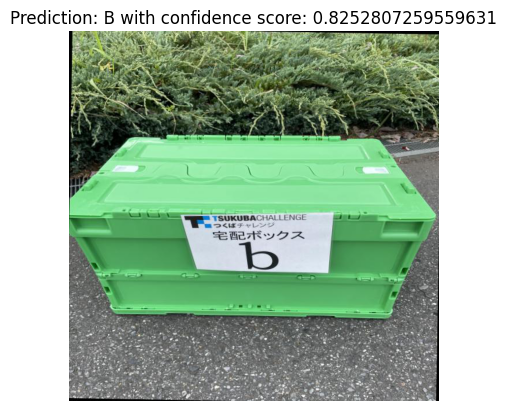

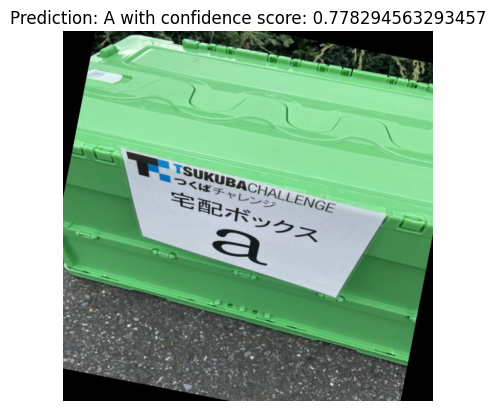

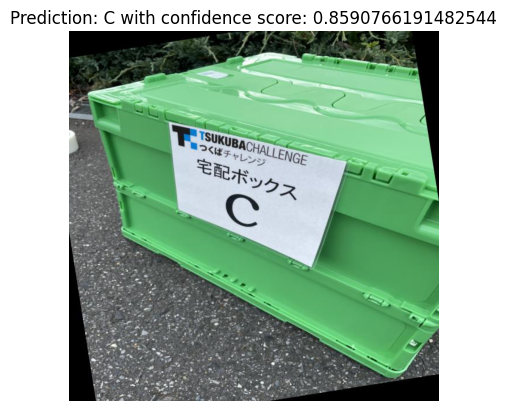

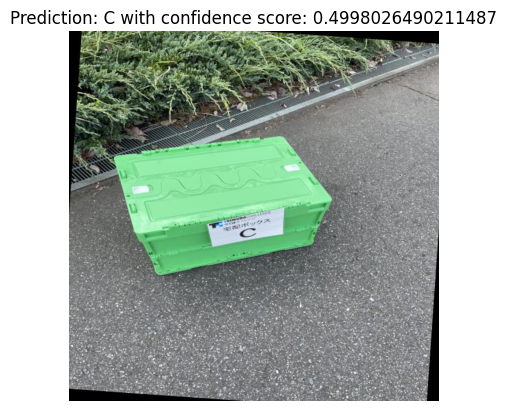

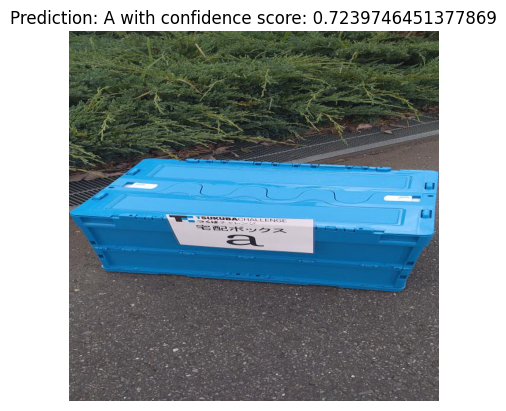

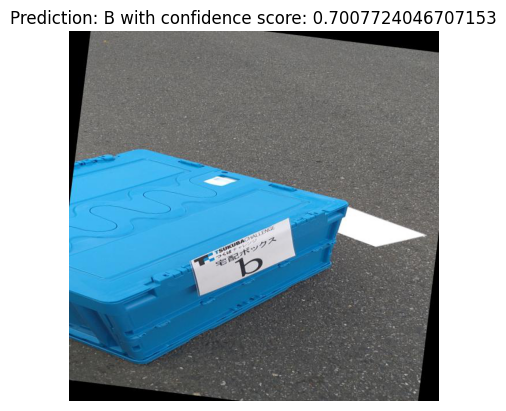

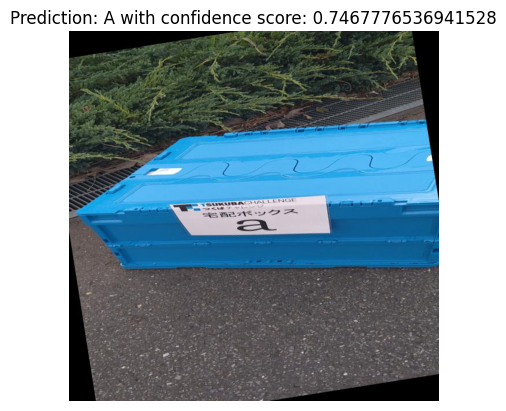

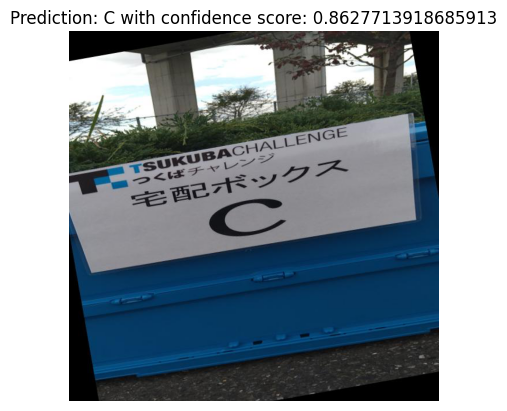

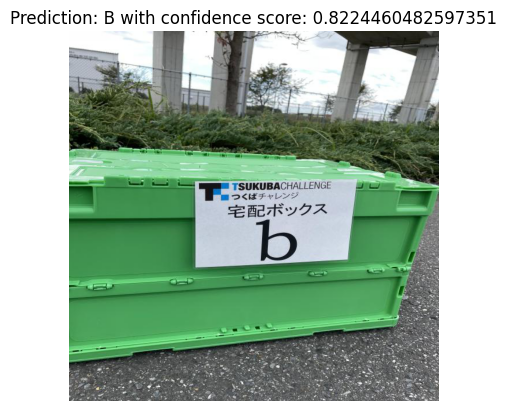

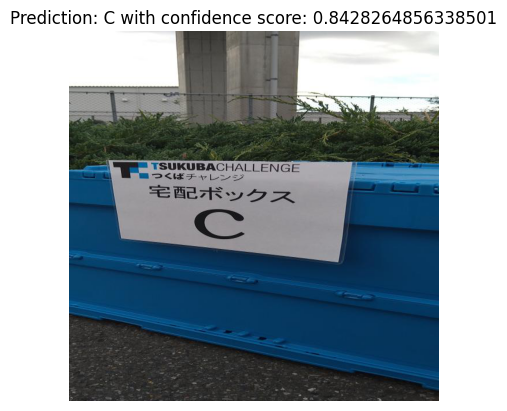

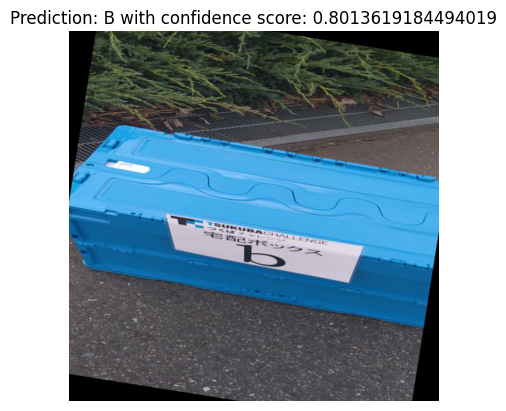

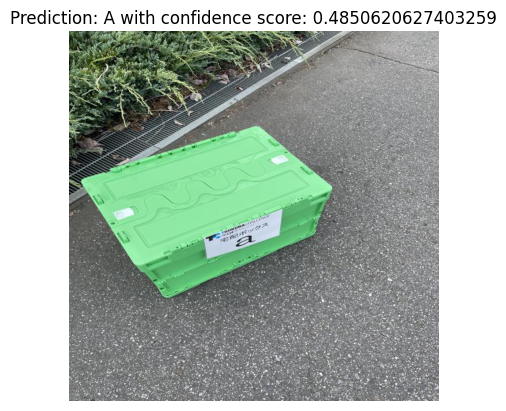

In [18]:
for image_name in os.listdir("./images/test/"):
    
    # infer on a local image
    predictions_data = model.predict(f"./images/test/{image_name}").json()
    
    prediction_item = predictions_data['predictions'][0]

    # Extract the predicted classes and their confidence values
    predicted_classes = prediction_item['predictions']

    # Find the letter with the highest confidence
    max_confidence_class = max(predicted_classes, key=lambda k: predicted_classes[k]['confidence'])

    # Extract the letter and its confidence value
    max_confidence_letter = max_confidence_class
    max_confidence_value = predicted_classes[max_confidence_class]['confidence']

    # Load the image using matplotlib.image.imread
    img = mpimg.imread(f"./images/test/{image_name}")

    # Display the image using matplotlib.pyplot.imshow
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.title(f"Prediction: {max_confidence_letter} with confidence score: {max_confidence_value}")
    plt.savefig(f"./images/prediction/{image_name}")
    plt.show()

---